# **VoxCity Demo**

You can easily learn how the Python package "VoxCity" works by following this demo.

Please execute cells from Step 1 to Step 5 by clicking the ▶️ icons.

It is important to note that you need to choose either Option 1 or Option 2 in Step 2 and execute only one.

# Step1. Prepare environment

In [1]:
#@title 1.1. Install voxcity
!pip install voxcity
!apt-get update
!apt-get install -y xvfb libgl1-mesa-glx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.1/472.1 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 177.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.

In [2]:
#@title 1.2. Authenticate Google Earth Engine (Click link, generate token, copy and paste the token)
!earthengine authenticate --auth_mode=notebook

Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/drive%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=6QGPhmC5ejefqQ7hse30YPi6QhtrC1Gzv4anJyetou8&tc=_GDOgxvTsI9g3dpp5wBvzGHCHX8YLSxPMK0NOgghhJo&cc=DgrLWbuWZHDdu9weKRSUHvWqdiR5u3vr7OHAg5hvHyE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ATX87lOmrA2Vdnj2LhTEBh7cxJjq6msoJZ25inxqxyBqBqBtEDrXxrfxteE

Successfully saved authorization token.


In [ ]:
#@title (Skip on Gooogle Colab) 1.3. Authenticate Google Earth Engine on local environment
# !earthengine authenticate

# import ee
# ee.Authenticate()
# ee.Initialize(project='your-project-id')

# Step2. Set target area by a rectangle

## 2.1. Option1 Set coordinates of vertices

In [8]:
rectangle_vertices = [
    (-74.02034270713835, 40.69992881162822),  # Southwest corner (longitude, latitude)
    (-74.02034270713835, 40.7111851828668),   # Northwest corner (longitude, latitude)
    (-74.00555129286164, 40.7111851828668),   # Northeast corner (longitude, latitude)
    (-74.00555129286164, 40.69992881162822)   # Southeast corner (longitude, latitude)
]

### 2.2. Option2 Draw a rectangle directly

In [4]:
#@title 2.2.1. Set target city (you need to fill in required values before executing!)
cityname = "new york" #@param {type:"string"}

In [5]:
#@title 2.2.2. Draw a rectangle on a map (Click ■ on the left side, then click the north west corner and the south east corner of the rectangle.)
from voxcity.geoprocessor.draw import draw_rectangle_map_cityname

m, rectangle_vertices = draw_rectangle_map_cityname(cityname, zoom=15)
m

Map(center=[40.7127281, -74.0060152], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Vertices of the drawn rectangle:
Longitude: -74.021334, Latitude: 40.70026
Longitude: -74.021334, Latitude: 40.710442
Longitude: -74.00769, Latitude: 40.710442
Longitude: -74.00769, Latitude: 40.70026


## 2.3. Option3 Set the center location and the width [m] (east-west) and height [m] (nort-south)

In [6]:
#@title 2.3.1. Set width (m) and height (m) (you need to fill in required values before executing!)
width = 1250 #@param {type:"number"}
height = 1250 #@param {type:"number"}

In [7]:
#@title 2.3.2. Draw a center point (circlemarker) on a map (Click ○ on the left side and then click the center location on the map.)
from voxcity.geoprocessor.draw import center_location_map_cityname

m, rectangle_vertices = center_location_map_cityname(cityname, width, height, zoom=15)
m

Map(center=[40.7127281, -74.0060152], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Point drawn at Longitude: -74.007904, Latitude: 40.711418
Rectangle vertices:
Longitude: -74.01530035557313, Latitude: 40.70578981736093
Longitude: -74.01530035557313, Latitude: 40.71704617713392
Longitude: -74.00050764442686, Latitude: 40.71704617713392
Longitude: -74.00050764442686, Latitude: 40.70578981736093


# Step3 Generate voxel city model

INFO | voxcity.voxcity.generator.api | Auto-selecting data sources for: building_source, land_cover_source, canopy_height_source, dem_source, building_complementary_source


Loading formatted geocoded file...


INFO | voxcity.voxcity.generator.api | Detected country for ROI center (-74.0129, 40.7056): United States
INFO | voxcity.voxcity.generator.api | Selected data sources:
INFO | voxcity.voxcity.generator.api | - Buildings(base)=OpenStreetMap | https://www.openstreetmap.org
INFO | voxcity.voxcity.generator.api | - Buildings(comp)=Microsoft Building Footprints | https://github.com/microsoft/GlobalMLBuildingFootprints
INFO | voxcity.voxcity.generator.api | - LandCover=Urbanwatch | https://gee-community-catalog.org/projects/urban-watch/
INFO | voxcity.voxcity.generator.api | - Canopy=High Resolution 1m Global Canopy Height Maps | https://gee-community-catalog.org/projects/meta_trees/
INFO | voxcity.voxcity.generator.api | - DEM=USGS 3DEP 1m | https://developers.google.com/earth-engine/datasets/catalog/USGS_3DEP_1m
INFO | voxcity.voxcity.generator.api | - ComplementHeight=10


Creating Land Use Land Cover grid
 
Data source: Urbanwatch

Urbanwatch Land Cover Classes (source-specific, 0-based indices):
-------------------------------------------------------
   0: Building
   1: Road
   2: Parking Lot
   3: Tree Canopy
   4: Grass/Shrub
   5: Agriculture
   6: Water
   7: Barren
   8: Unknown
   9: Sea
-------------------------------------------------------
Note: These source-specific classes will be converted to
      VoxCity Standard Classes (1-14) during voxelization.

Access 2D land cover grid from VoxCity object:
  land_cover_grid = voxcity.land_cover.classes

Downloaded image 1/36
Downloaded image 2/36
Downloaded image 3/36
Downloaded image 4/36
Downloaded image 5/36
Downloaded image 6/36
Downloaded image 7/36
Downloaded image 8/36
Downloaded image 9/36
Downloaded image 10/36
Downloaded image 11/36
Downloaded image 12/36
Downloaded image 13/36
Downloaded image 14/36
Downloaded image 15/36
Downloaded image 16/36
Downloaded image 17/36
Downloaded image 18/

Reading input: /tmp/bb65040a-4a7d-4e17-87c4-13c0d8a710e8.tif



Image saved to /tmp/bb65040a-4a7d-4e17-87c4-13c0d8a710e8.tif


Adding overviews...
Updating dataset tags...
Writing output to: /content/output/land_cover.tif


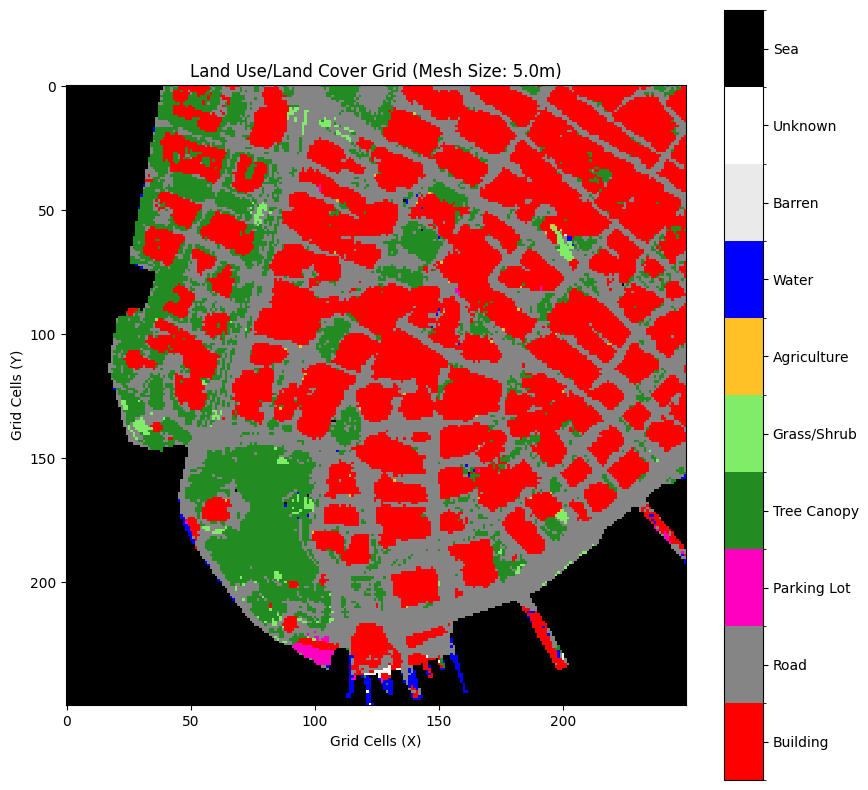

Creating Building Height grid
 
Base data source: OpenStreetMap
Complementary data source: Microsoft Building Footprints
File downloaded successfully and saved as output/dataset-links.csv
File downloaded successfully and saved as output/NorthAmerica_032010110.gz
188 of the total 1930 building footprint from the base data source did not have height data.
For 0 of these building footprints without height, values from the complementary source were assigned.
For 188 of these building footprints without height, no data exist in complementary data.


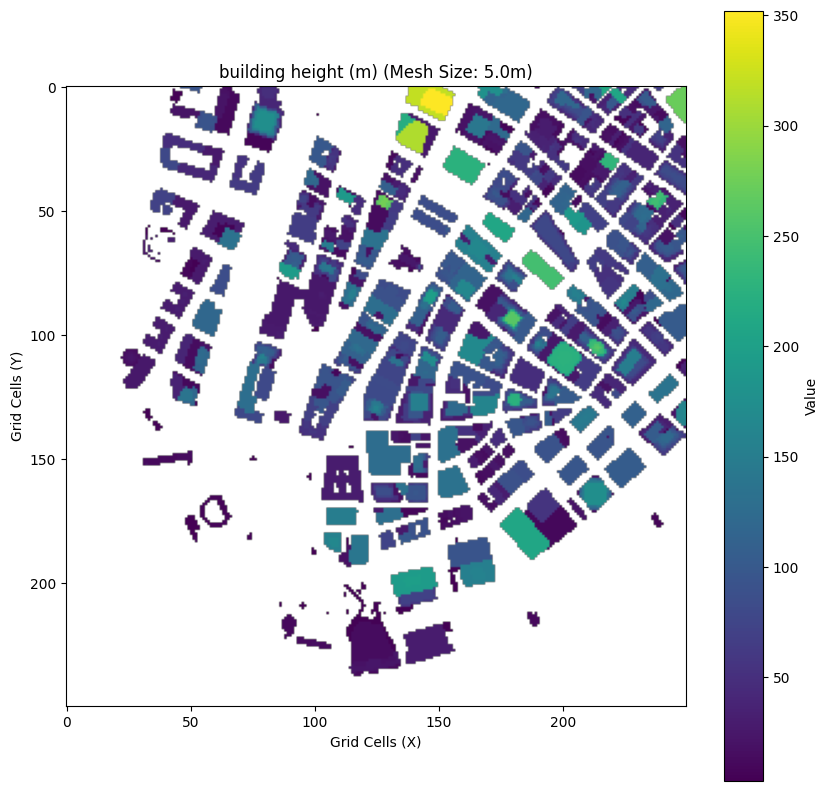

Creating Canopy Height grid
 
Data source: High Resolution 1m Global Canopy Height Maps


Reading input: /tmp/b6e71baa-d172-4ead-8bb1-de498137fbca.tif

Updating dataset tags...
Writing output to: /content/output/canopy_height.tif


Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to /tmp/b6e71baa-d172-4ead-8bb1-de498137fbca.tif


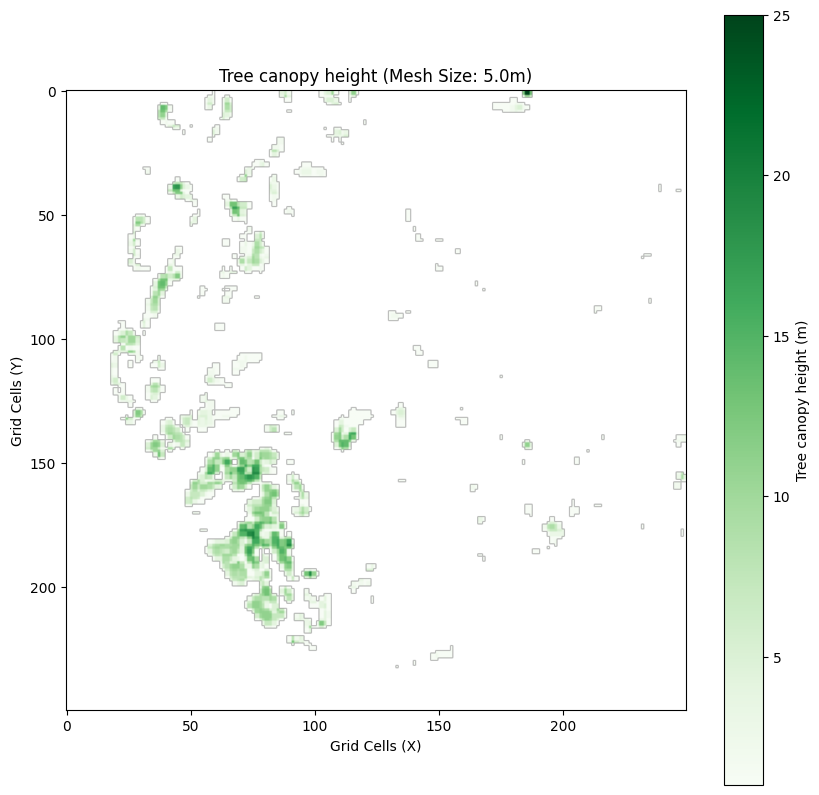

Creating Digital Elevation Model (DEM) grid
 
Data source: USGS 3DEP 1m
Generating URL ...
Please wait ...
Data downloaded to /content/output/dem.tif


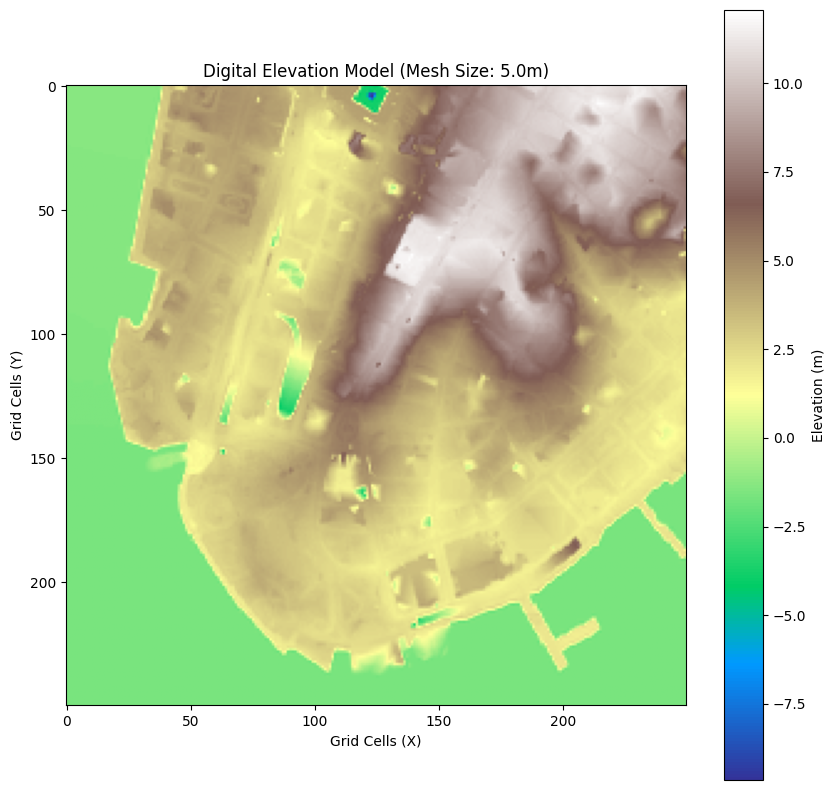

Generating 3D voxel data

Voxel Grid Semantic Codes:
  -3 : Building volume
  -2 : Tree canopy (vegetation)
  -1 : Ground/Subsurface
  >=1: Land cover class at ground surface (see Land Cover Classes)


VoxCity Standard Land Cover Classes (1-based indices, used in voxel grids):
--------------------------------------------------
   1: Bareland           - Bare soil, rocks, desert
   2: Rangeland          - Grassland, pasture
   3: Shrub              - Shrubland, bushes
   4: Agriculture land   - Cropland, farmland
   5: Tree               - Forest, tree cover
   6: Moss and lichen    - Moss, lichen cover
   7: Wet land           - Wetland, marsh
   8: Mangrove           - Mangrove forest
   9: Water              - Water bodies
  10: Snow and ice       - Snow, ice, glaciers
  11: Developed space    - Urban areas, parking
  12: Road               - Roads, paved surfaces
  13: Building           - Building footprints
  14: No Data            - Missing or invalid data
-----------------------

In [9]:
#@title 3.1. Option1 With automatically selected data sources
from voxcity.generator import get_voxcity
meshsize = 5 # meters
voxcity = get_voxcity(rectangle_vertices, meshsize)

### 3.2. Option2 With specified data sources

In [ ]:
#@title 3.2.1 Set data sources and meshsize (m)
building_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Global Building Atlas', 'Overture', 'EUBUCCO v0.1', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'Local file']
building_complementary_source = "Microsoft Building Footprints" #@param ['None', 'Global Building Atlas', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'England 1m DSM - DTM', 'Netherlands 0.5m DSM - DTM', 'OpenMapTiles', 'Local file', 'OpenStreetMap', 'Overture', 'EUBUCCO v0.1']
land_cover_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Urbanwatch', 'OpenEarthMapJapan', 'ESA WorldCover', 'ESRI 10m Annual Land Cover', 'Dynamic World V1']
canopy_height_source = 'High Resolution 1m Global Canopy Height Maps' #@param ['High Resolution 1m Global Canopy Height Maps', 'ETH Global Sentinel-2 10m Canopy Height (2020)', 'Static']
dem_source = 'USGS 3DEP 1m' #@param ['DeltaDTM', 'FABDEM', 'England 1m DTM', 'DEM France 1m', 'Netherlands 0.5m DTM', 'AUSTRALIA 5M DEM', 'USGS 3DEP 1m', 'NASA', 'COPERNICUS', 'Flat']

In [ ]:
#@title 3.2.2 Model generation
from voxcity.generator import get_voxcity
meshsize = 5 # meters
voxcity = get_voxcity(
    rectangle_vertices,
    meshsize,
    building_source=building_source,
    building_complementary_source=building_complementary_source,
    land_cover_source=land_cover_source,
    canopy_height_source=canopy_height_source,
    dem_source=dem_source
)

In [ ]:
#@title (Optional) Load a saved voxel city data
from voxcity.generator.io import load_voxcity
input_path = "output/voxcity.pkl"
voxcity = load_voxcity(input_path)

## Step4 Visualize the voxel city model

In [10]:
#@title 4.1. Option1 Interactive mode
from voxcity.visualizer import visualize_voxcity
visualize_voxcity(voxcity, mode="interactive", voxel_color_map="default", downsample=1)

Output hidden; open in https://colab.research.google.com to view.

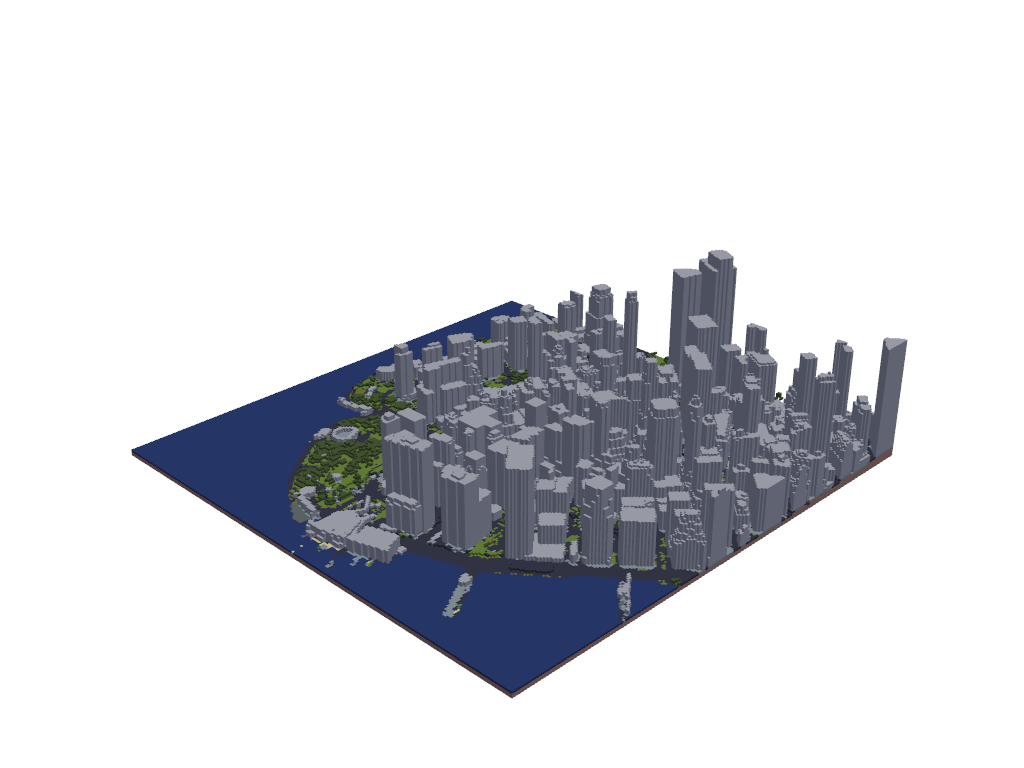

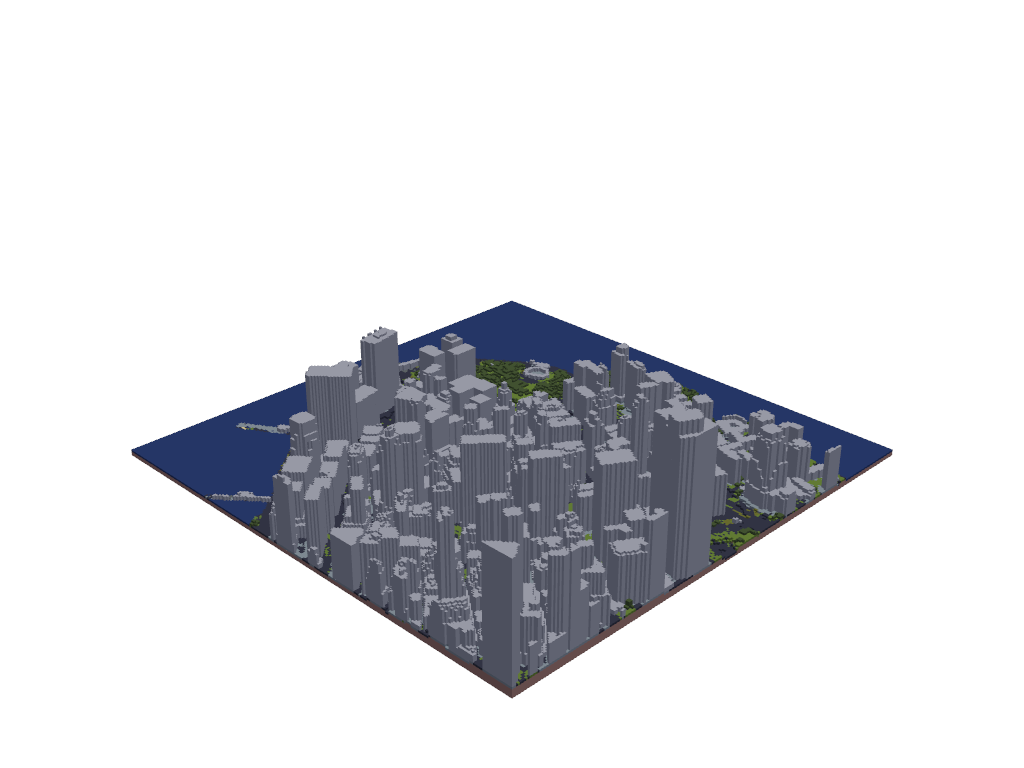

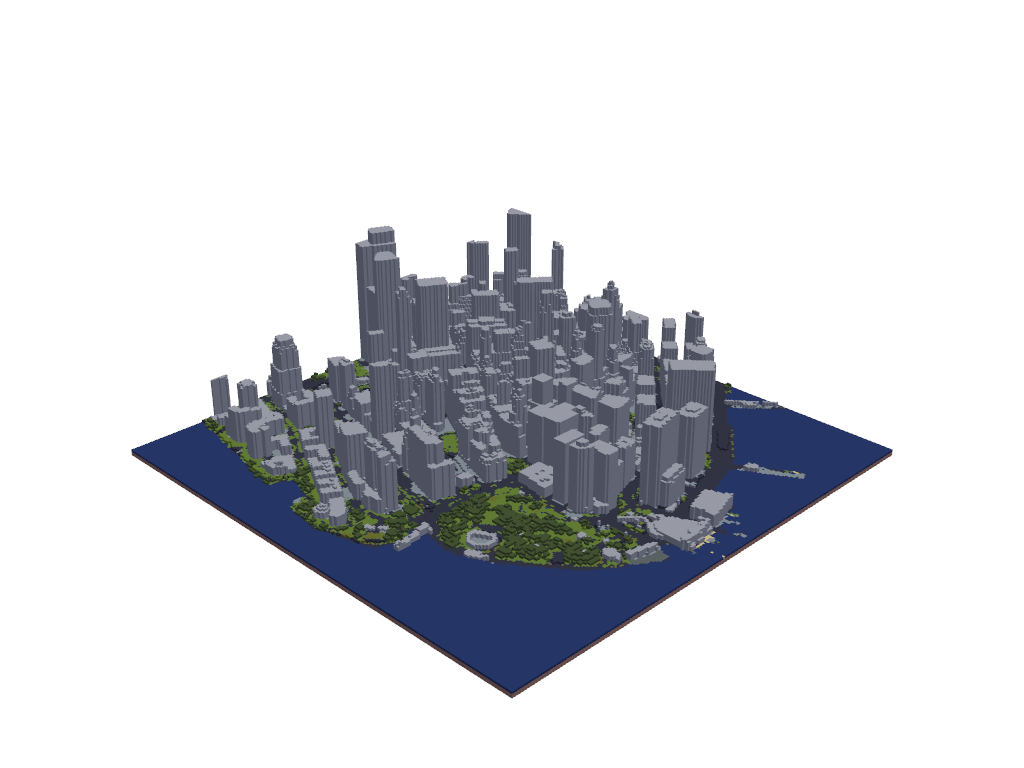

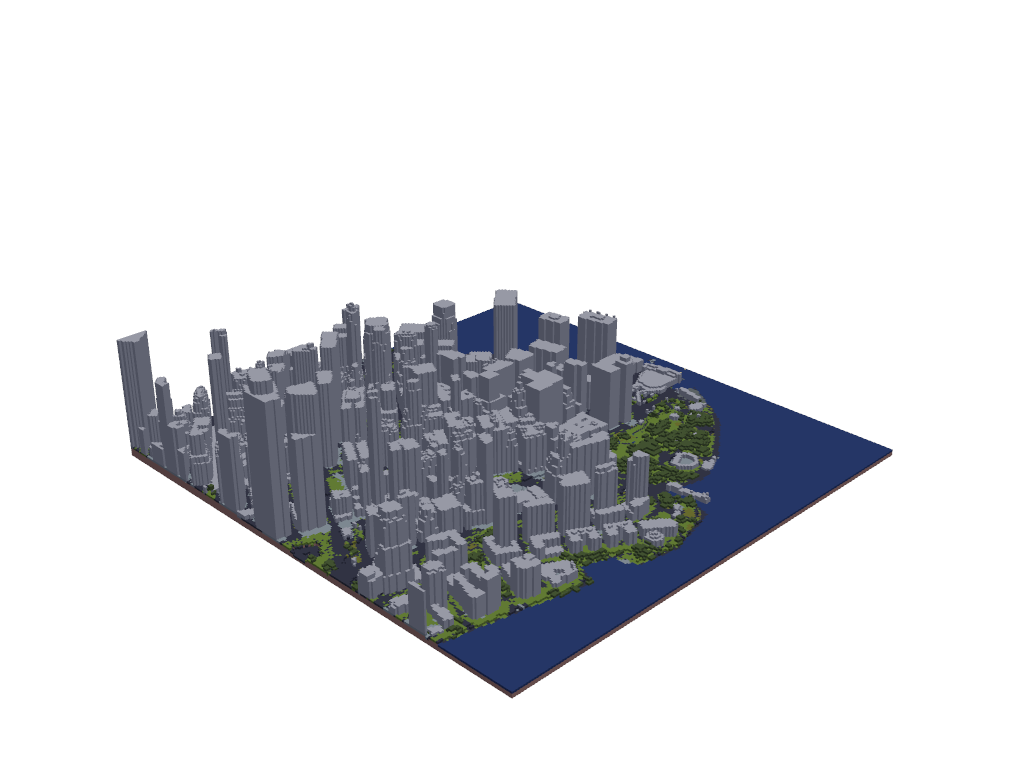

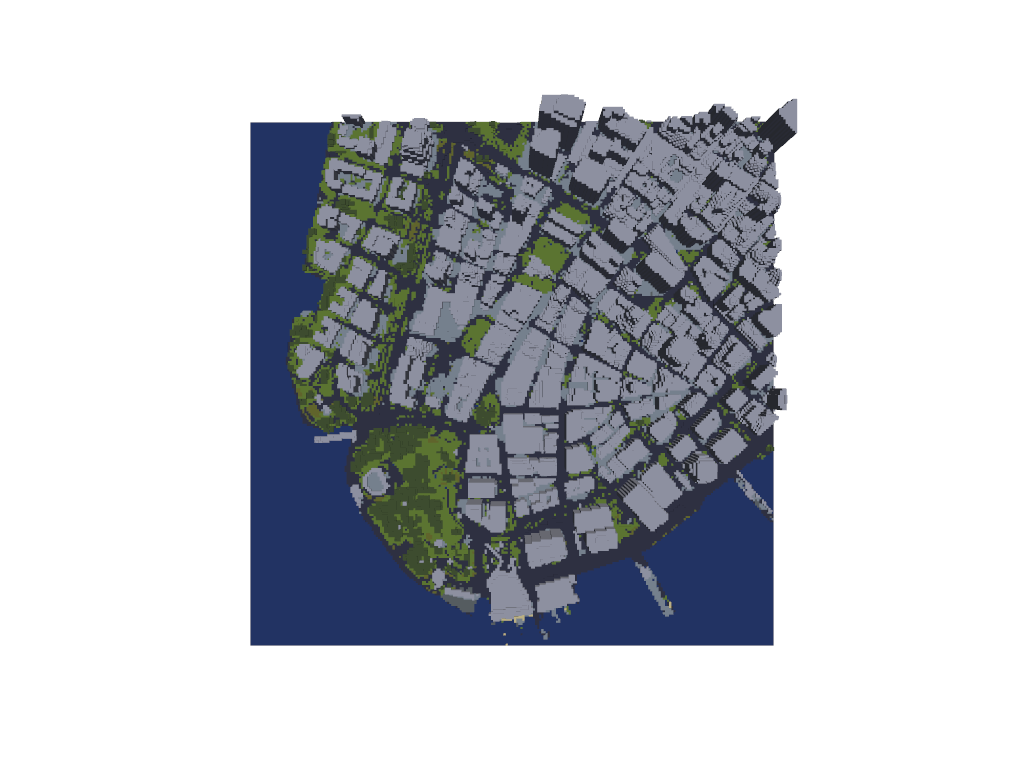

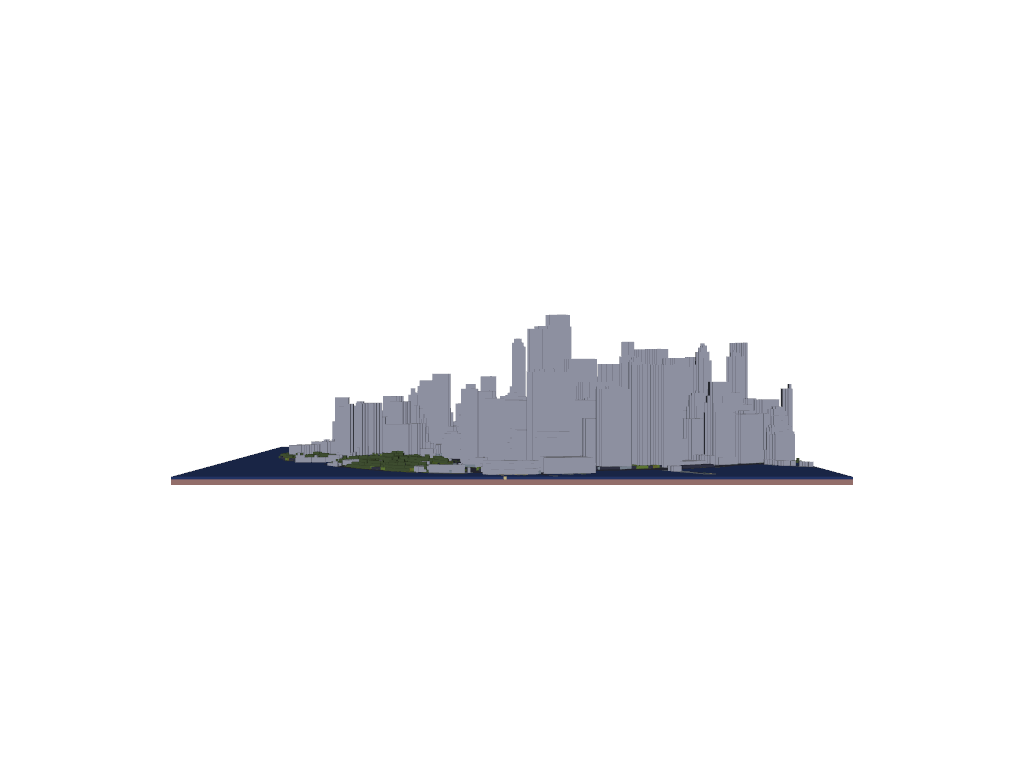

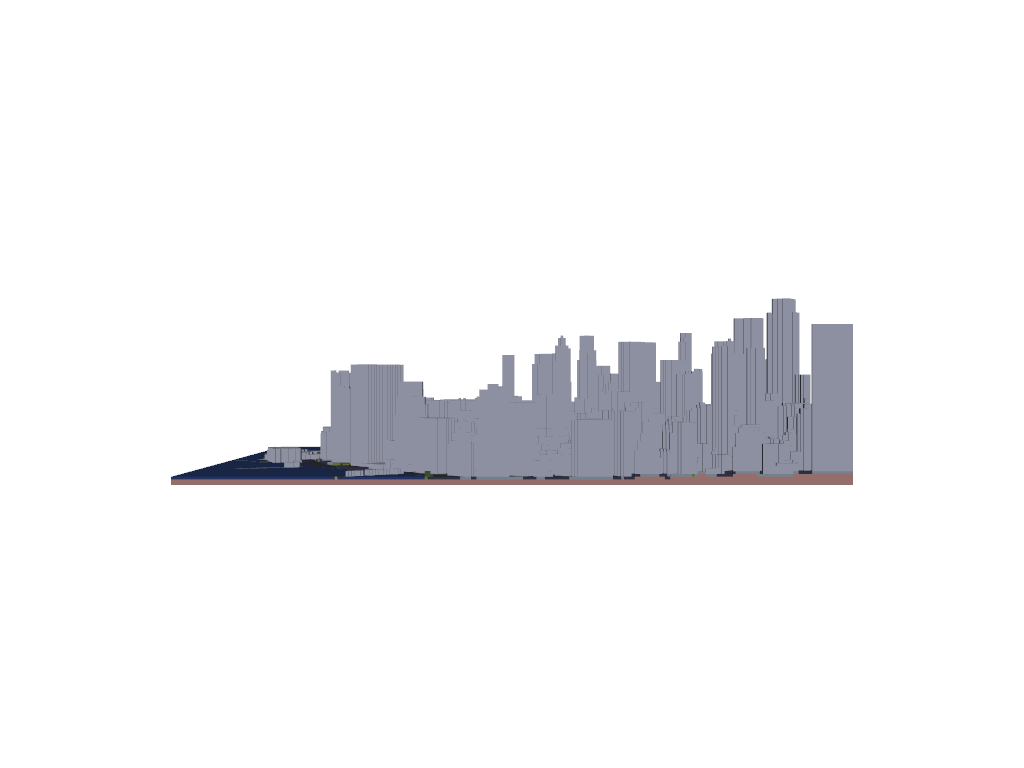

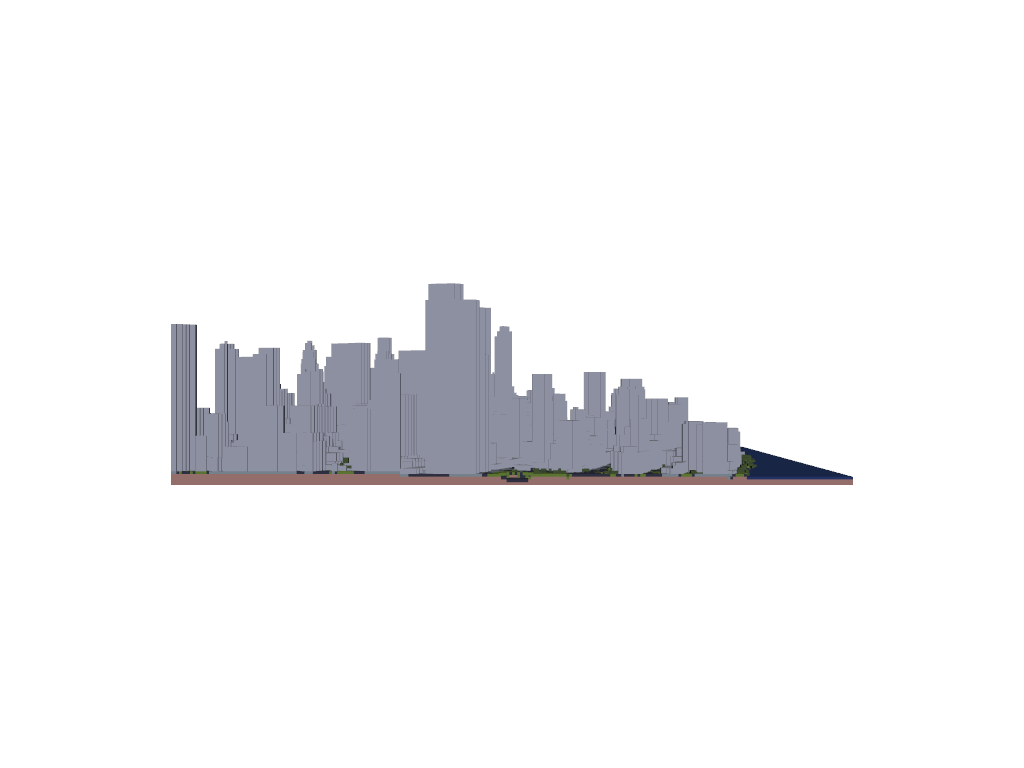

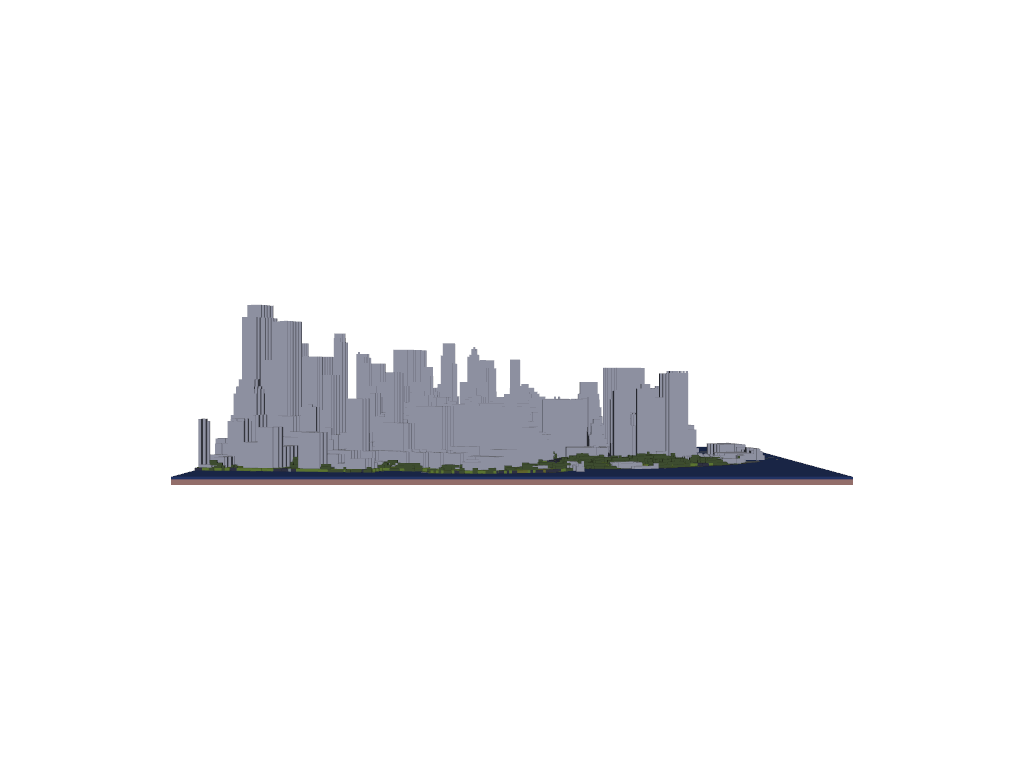

In [11]:
#@title 4.1. Option2 Static mode
from voxcity.visualizer import visualize_voxcity
from IPython.display import display, Image

images = visualize_voxcity(voxcity, mode="static", output_directory="output", projection_type="perspective")
for name, path in images:
    display(Image(filename=path))

# Step5 Export files

In [ ]:
#@title 5.1. Export INX file for ENVI-MET
from voxcity.exporter.envimet import export_inx, generate_edb_file

output_directory = './output/obj'
file_basename = 'voxcity'
export_inx(voxcity, output_directory, file_basename)
generate_edb_file()

In [ ]:
#@title 5.2. VOX file for MagicaVoxel
from voxcity.exporter.magicavoxel import export_magicavoxel_vox

output_path = f"output/magicavoxel"
export_magicavoxel_vox(voxcity, output_path)

In [ ]:
#@title 5.3. OBJ file
from voxcity.exporter.obj import export_obj

output_directory = './output/obj'
output_file_name = 'voxcity'
export_obj(voxcity, output_directory, output_file_name)

In [ ]:
#@title 5.4 CityLES input files (with under-tree ground class control)
from voxcity.exporter.cityles import export_cityles

output_directory = "output/cityles"
export_cityles(voxcity, output_directory)


# Step6 Urban simulations

# 6.1. Solar radiation

Auto-detected regions: North_and_Central_America, USA, Europe
Fetching weather station data from Climate.OneBuilding.Org...
Scanning Canada...
Found 3437 stations in Canada
Scanning USA...
Found 10696 stations in USA
Scanning Caribbean...
Found 1534 stations in Caribbean
Scanning Europe...
Found 12570 stations in Europe

Total stations found: 28237


Downloaded EPW file for New.York-Downtown.Manhattan.Heli NY USA
Distance: 0.61 km
Station coordinates: -74.009, 40.701
WMO: 720553
Climate zone: 4A - Mixed - Humid
Data period: 2011-2018
Files saved:
- EPW: output/new.york-downtown.manhattan.heli_ny_usa.epw
- Metadata: output/new.york-downtown.manhattan.heli_ny_usa.json

Loading EPW data...
Loaded 8760 hourly records


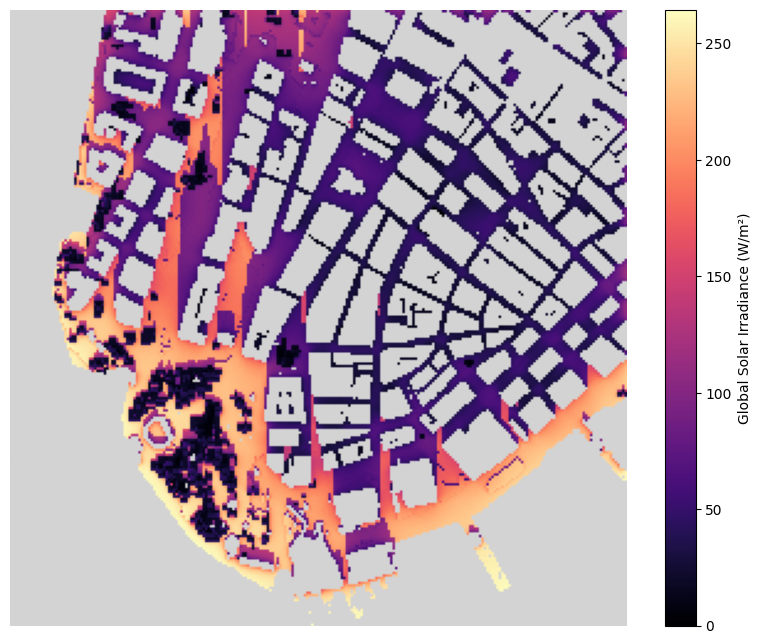

In [12]:
#@title 6.1.1. Ground-level solar irradiance (instantaneous)
from voxcity.simulator.solar import get_global_solar_irradiance_using_epw

solar_kwargs = {
    "download_nearest_epw": True,  # Whether to automatically download nearest EPW weather file based on location from Climate.OneBuilding.Org
    "calc_time": "01-01 12:00:00",  # Time for instantaneous calculation in format "MM-DD HH:MM:SS"
    "view_point_height": 1.5,  # Height of view point in meters for calculating solar access. Default: 1.5 m
    "output_directory": 'output/test',  # Directory for saving output files
}

# Compute global solar irradiance map (direct + diffuse radiation)
solar_grid = get_global_solar_irradiance_using_epw(
    voxcity,                             # VoxCity object containing voxel data and metadata
    calc_type='instantaneous',           # Calculate instantaneous irradiance at specified time
    **solar_kwargs                       # Pass all the parameters defined above
)

In [13]:
#@title 6.1.1. Solar irradiance on building surfaces (cumulative)
from voxcity.simulator.solar import get_building_global_solar_irradiance_using_epw
from voxcity.visualizer import visualize_voxcity
from IPython.display import display, Image

# Define kwargs dictionary for cumulative calculation
cumulative_kwargs = {
    "calc_type": "cumulative",  # For cumulative calculations over a period
    "download_nearest_epw": True,
    "period_start": "01-01 07:00:00",  # June 1st at 7 AM
    "period_end": "01-31 19:00:00",    # June 30th at 7 PM
}

# Example 2: Cumulative calculation for a month
cumulative_irradiance = get_building_global_solar_irradiance_using_epw(
    voxcity,                    # VoxCity object containing voxel data and metadata
    **cumulative_kwargs
)

# both overlays at once
visualize_voxcity(
    voxcity,
    mode="interactive",
    building_sim_mesh=cumulative_irradiance,
    building_value_name='global',
    building_colormap='magma',
    voxel_color_map='grayscale',
    downsample=1
)

Output hidden; open in https://colab.research.google.com to view.

#6.2. View index

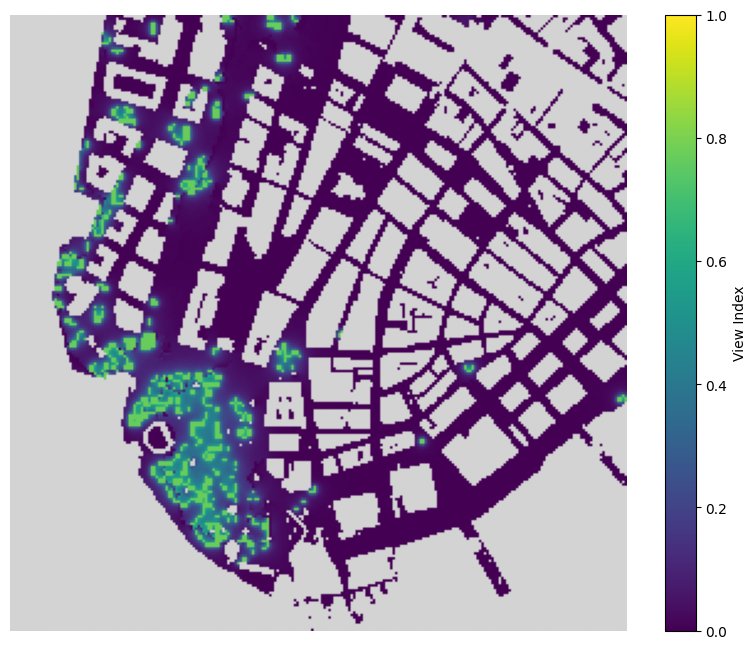

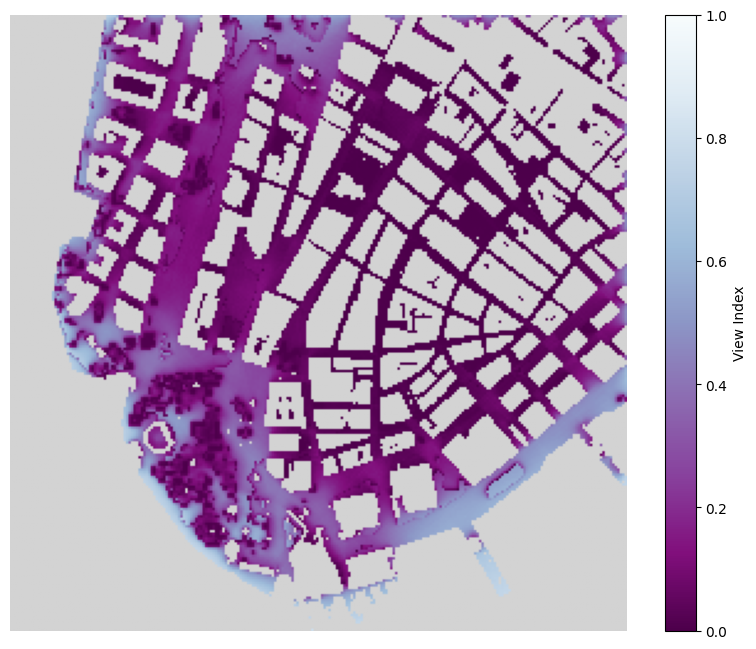

In [14]:
#@title 6.2.1. Green view index, Sky view index
from voxcity.simulator.visibility import get_view_index
from voxcity.visualizer.renderer import visualize_voxcity
from IPython.display import display, Image

view_kwargs = {
    "view_point_height": 1.5,      # Height of observer viewpoint in meters
    "colormap": "viridis",         # Colormap for visualization
    "output_directory": "output",  # Directory to save output files
}

# Compute Green View Index using mode='green'
gvi_grid = get_view_index(voxcity, mode='green', **view_kwargs)

# Adjust parameters for Sky View Index
view_kwargs["colormap"] = "BuPu_r"
view_kwargs["output_file_name"] = "svi"
view_kwargs["elevation_min_degrees"] = 0

# Compute Sky View Index using mode='sky'
svi_grid = get_view_index(voxcity, mode='sky', **view_kwargs)

In [15]:
#@title 6.2.2. Green view index on building surfaces
from voxcity.simulator.visibility import get_surface_view_factor
from voxcity.visualizer import visualize_voxcity
import numpy as np

# Compute GVI on building surfaces (trees only)
building_gvi_mesh = get_surface_view_factor(
    voxcity,                                  # VoxCity object containing voxel data and metadata
    target_values=(-2,2,3,4,5,6,7,8),         # tree voxels
    inclusion_mode=True,         # count rays that hit trees
    progress_report=True         # show progress
)

# Overlay on voxels in Plotly
visualize_voxcity(
    voxcity,
    building_sim_mesh=building_gvi_mesh,
    building_value_name='view_factor_values',  # matches default metadata key
    building_colormap='viridis',
    building_opacity=1.0,
    building_vmin=0.0,
    building_vmax=0.2,
    render_voxel_buildings=False,  # hide class -3 voxel cubes for clarity
    voxel_color_map='grayscale',
    downsample=1
)

Output hidden; open in https://colab.research.google.com to view.

# 6.3. Landmark visibility

In [16]:
#@title 6.3.1. Map for drawing a polygon to specify landmark buildings - draw a polygon that includes all desired landmark building footprints
from voxcity.geoprocessor.draw import display_buildings_and_draw_polygon

# Create interactive map with buildings and get drawn polygon
m_landmark, landmark_polygon = display_buildings_and_draw_polygon(voxcity)
m_landmark

Map(center=[40.70555699724751, -74.012947], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Polygon 1 drawn with 5 vertices (color: blue):
  Vertex 1: (lon, lat) = (-74.013328, 40.705701)
  Vertex 2: (lon, lat) = (-74.013628, 40.705229)
  Vertex 3: (lon, lat) = (-74.013467, 40.704977)
  Vertex 4: (lon, lat) = (-74.012609, 40.705034)
  Vertex 5: (lon, lat) = (-74.012448, 40.705416)
Total polygons: 1


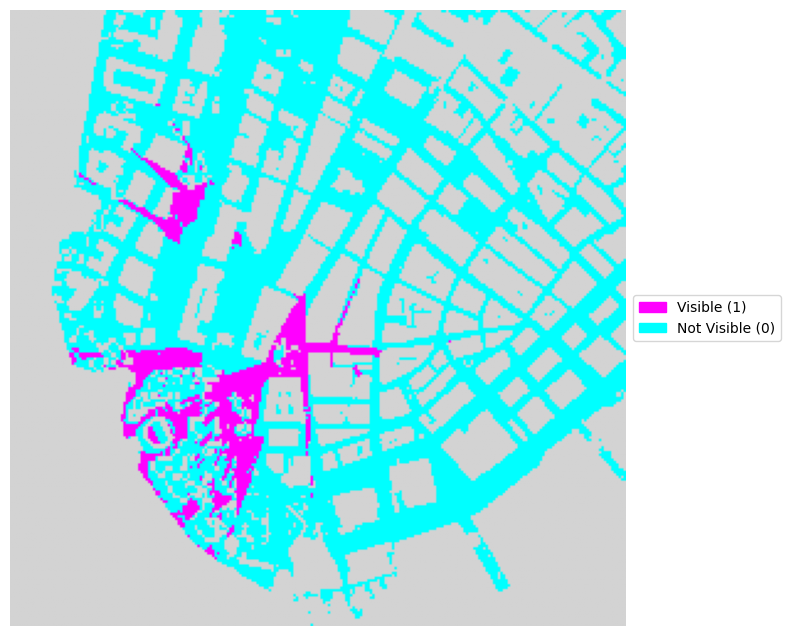

In [17]:
#@title 6.3.2. Simulate landmark visibility
from voxcity.simulator.view import get_landmark_visibility_map  # Import function to analyze landmark visibility from different viewpoints

landmark_kwargs = {
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "landmark_polygon": landmark_polygon,
    "colormap": 'cool', # Choose a colormap.  Default: 'viridis'.
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}

landmark_vis_map, voxcity_grid_landmark = get_landmark_visibility_map(  # Calculate visibility map for landmarks
    voxcity,                                    # VoxCity object containing voxel data and metadata
    **landmark_kwargs                           # Pass all configuration parameters defined above
)

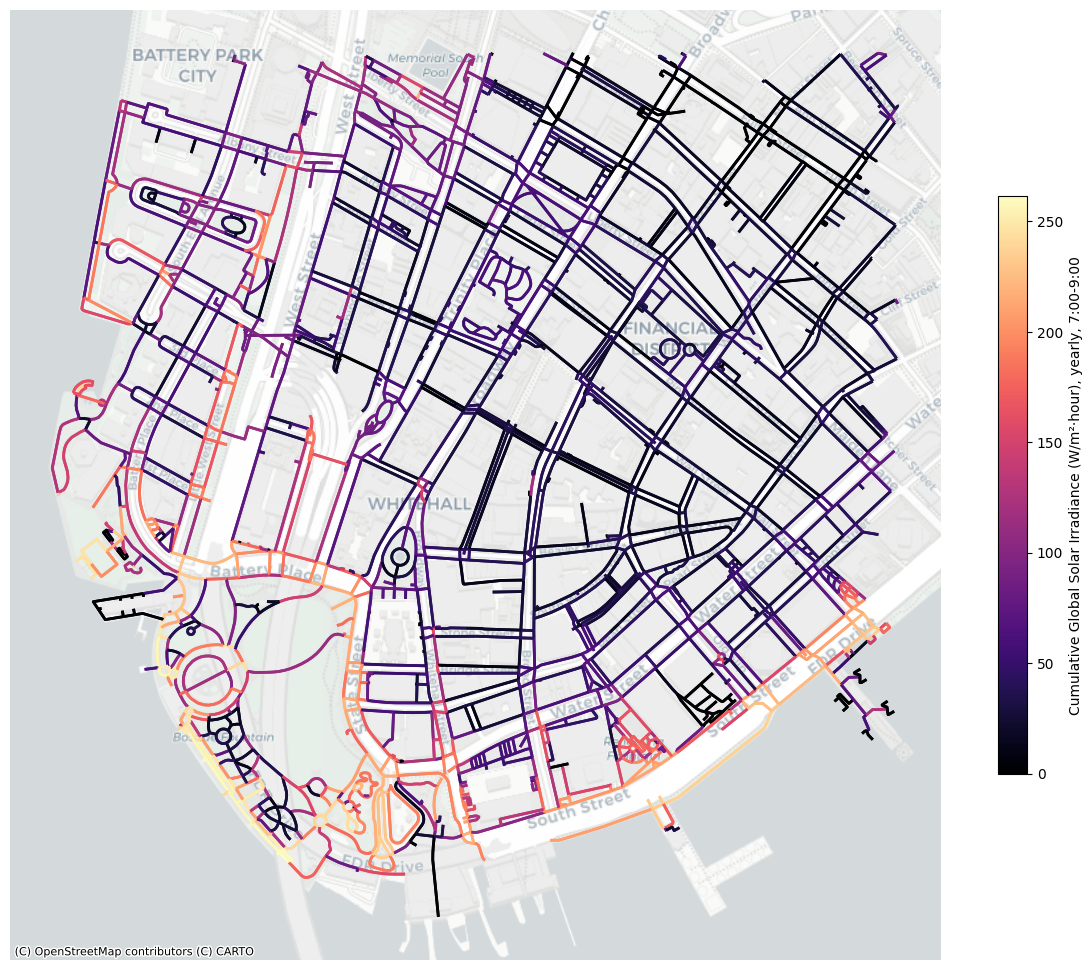

In [18]:
#@title Data aggregation by road networks
from voxcity.geoprocessor.network import get_network_values

network_kwargs = {
    "network_type": "walk",
    "colormap": "magma",
    "vis_graph": True,
    "vmin": 0.0,
    # "vmax": 65000,
    "edge_width": 2,
    "alpha": 0.8,
    "zoom": 16
}

G, solar_edge_gdf = get_network_values(
    solar_grid,
    voxcity=voxcity,
    value_name='Cumulative Global Solar Irradiance (W/m²·hour), yearly, 7:00-9:00',
    **network_kwargs
)